In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from textwrap import fill, wrap
import os



In [9]:
forcing = xr.open_dataset('input_frc.nc')
medres_forcing = xr.open_dataset('../medres/input_frc.nc')

In [5]:
def convertToSin(data, field, amplitude):
    var_data = data[field].values
    one_level = var_data[0, :, 0]
    Y_field = data[field].dims[1]
    X_field = data[field].dims[2]
    time_field = data[field].dims[0]
    Y = data[Y_field]
    X = data[X_field]
    time = data[time_field]

    L = Y[-1].values - Y[0].values

    new_level = [amplitude * np.sin(2 * np.pi / L * (Y[i].values - Y[0].values)) for i in range(len(Y))]

    new_values = np.zeros_like(var_data)
    for t in range(len(time.values)):
        for xi in range(len(X.values)):
            new_values[t, :, xi] = new_level

    return new_values

def linear_gradient(data, field, south_value, north_value):
    one_level = data[field].values[0][:][0]
    Y_field = data[field].dims[1]
    X_field = data[field].dims[2]
    time_field = data[field].dims[0]
    Y = data[Y_field]
    X = data[X_field]
    time = data[time_field]

    L = Y[-1].values - Y[0].values

    new_values = np.zeros_like(data[field].values)
    for t in range(len(time.values)):
        for xi in range(len(X.values)):
            new_values[t, :, xi] = np.linspace(south_value, north_value, len(Y))


    return new_values

In [12]:
# wind stress u-component
forcing.sustr.values = convertToSin(forcing, 'sustr', 0.01) * -1
forcing.svstr.values = np.ones_like(forcing.svstr.values) * -0.005
forcing.shflux.values = np.zeros_like(forcing.shflux.values)
forcing.swflux.values = np.zeros_like(forcing.swflux.values)
forcing.SST.values = linear_gradient(forcing, 'SST', 12.5, 14.5)
forcing.SST.values = forcing.SST.values[:,::-1,:]
forcing.SSS.values = np.ones_like(forcing.SSS.values) * 34.0
forcing.dQdSST.values = np.ones_like(forcing.dQdSST.values) * -28.5865

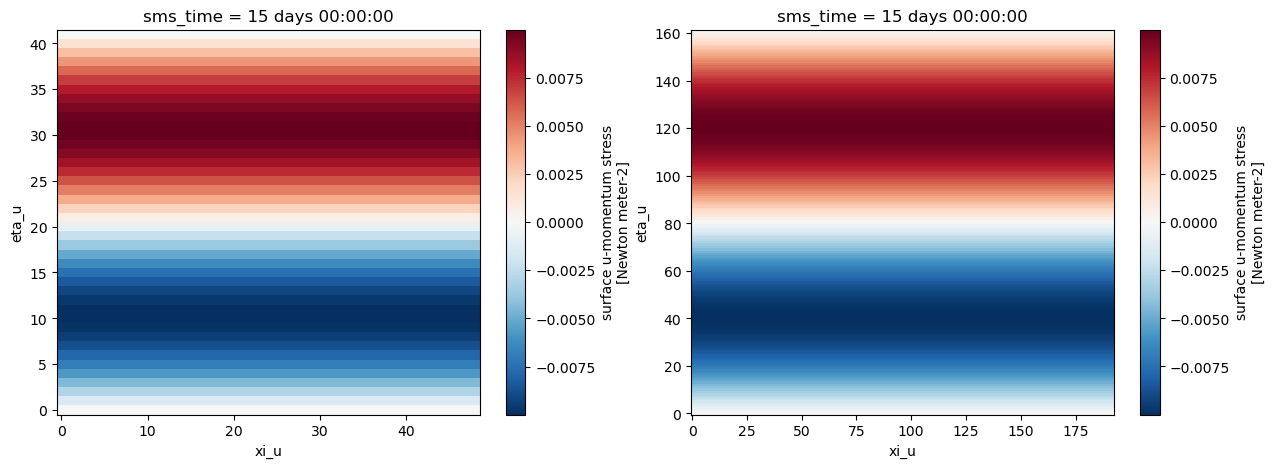

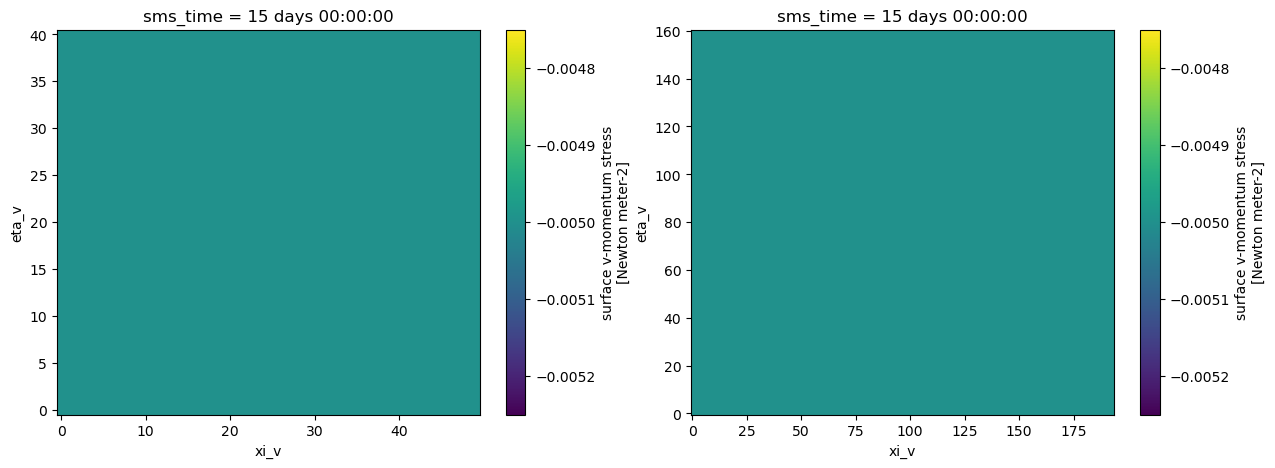

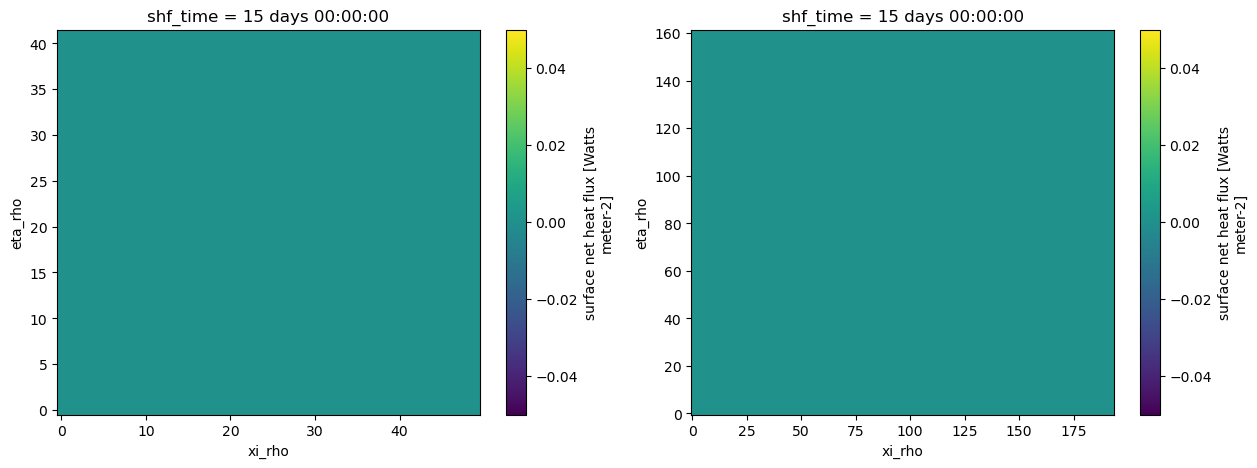

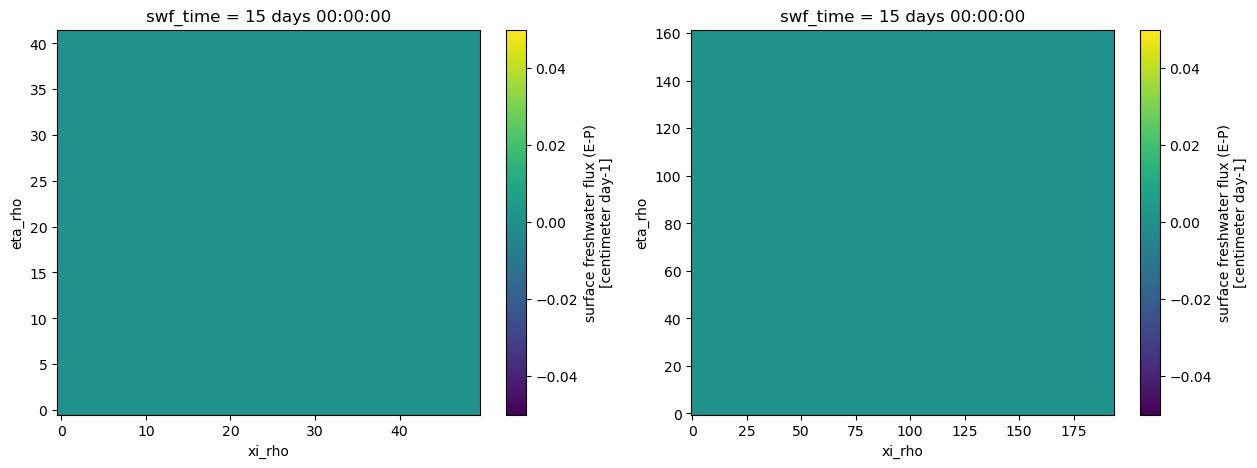

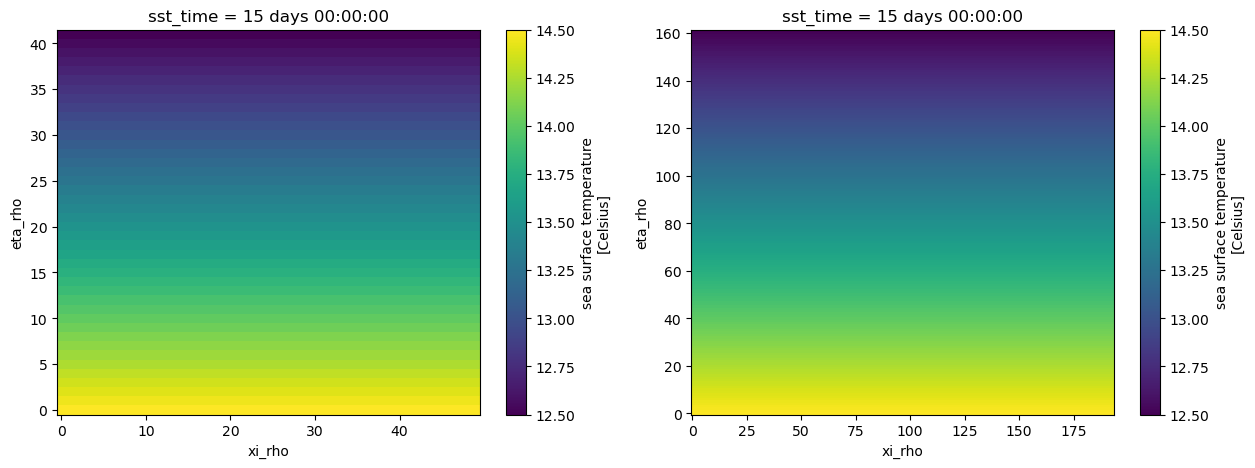

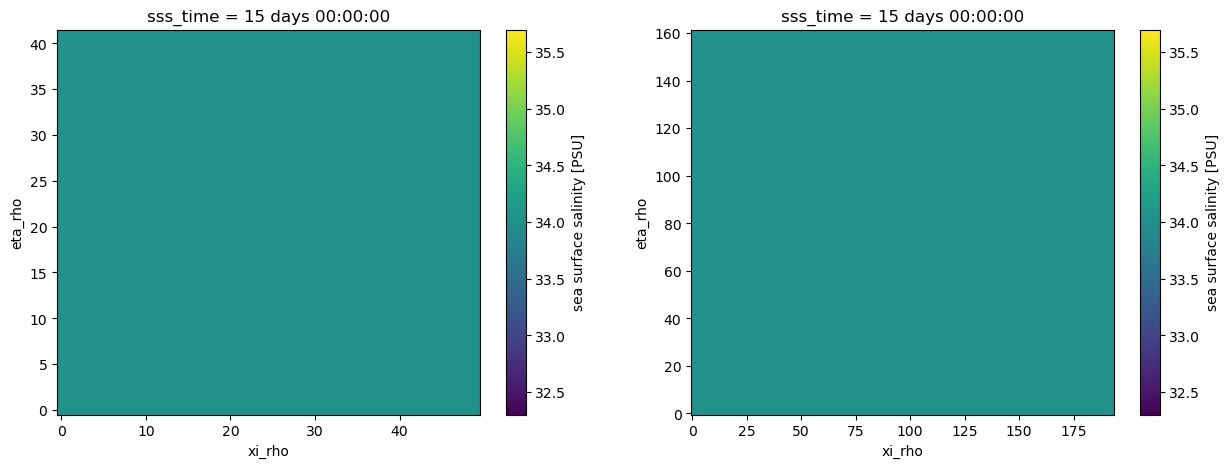

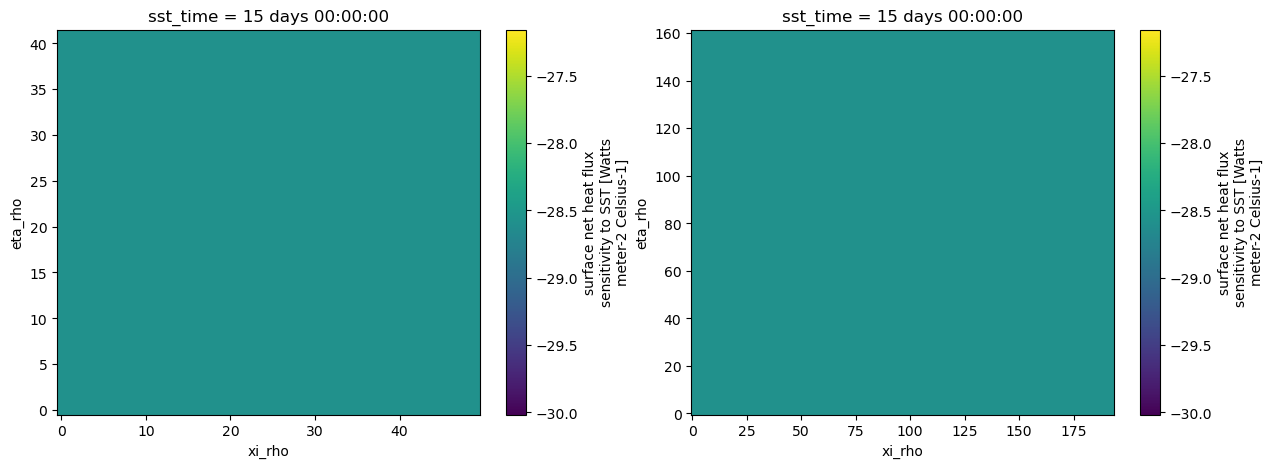

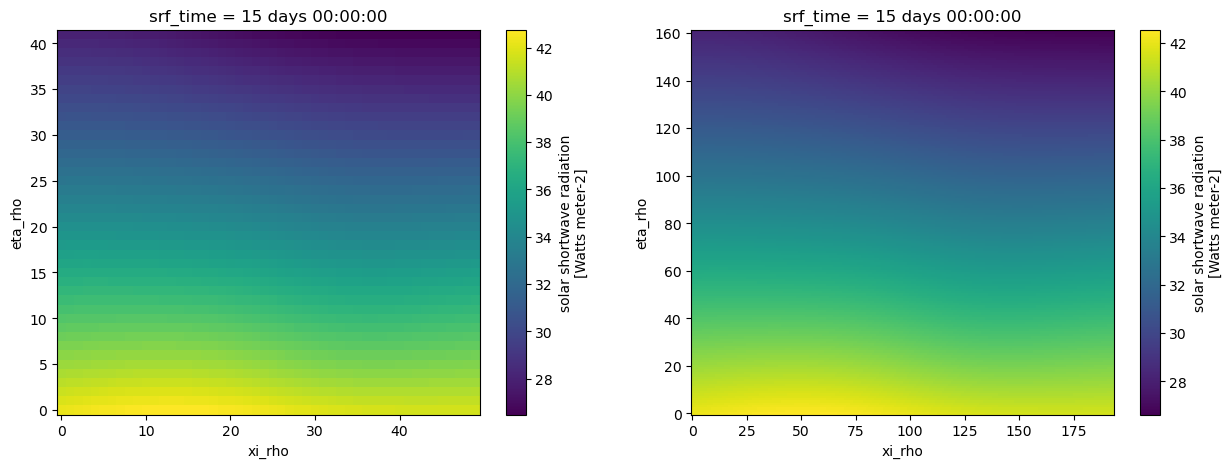

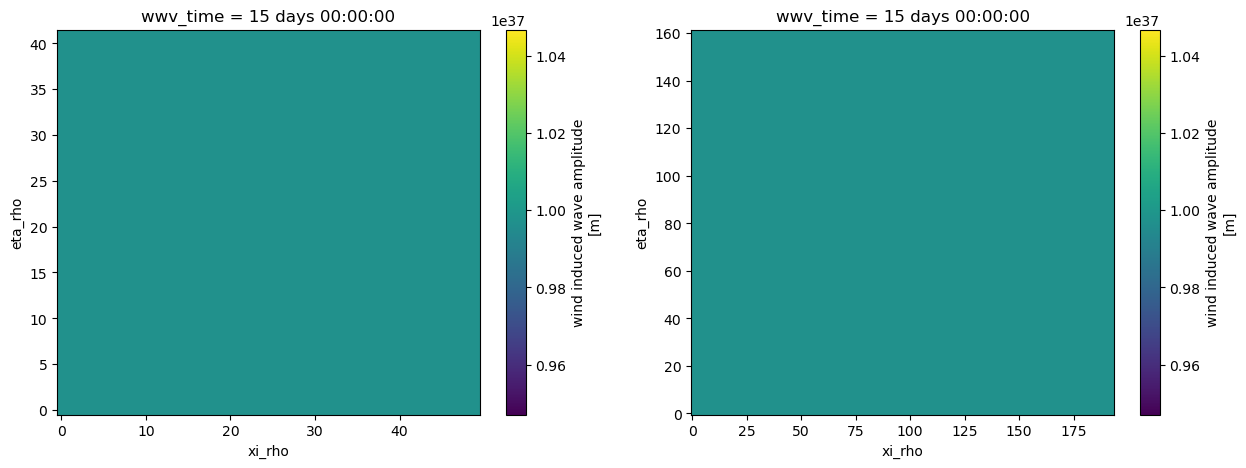

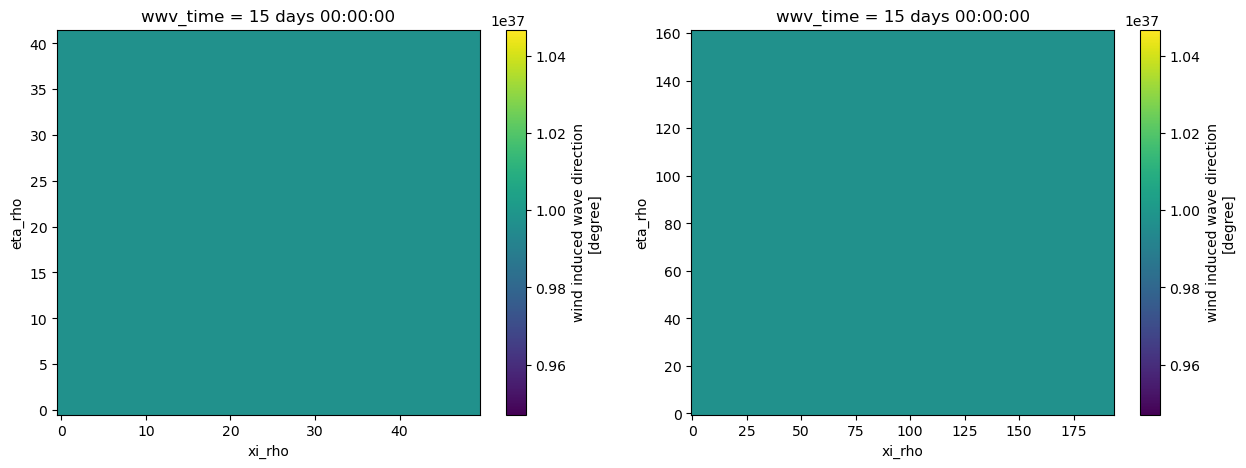

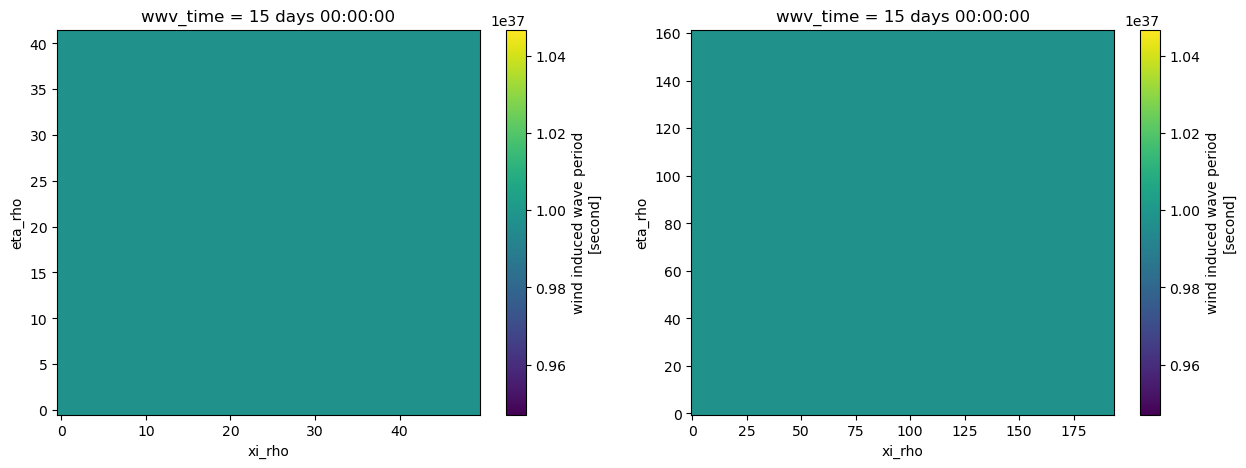

In [14]:

vars = forcing.data_vars
for var in vars:
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    forcing[var][0, :, :].plot(ax=ax[0])
    medres_forcing[var][0, :, :].plot(ax=ax[1])
    

In [16]:
#save the new forcing file
forcing.to_netcdf('input_frc_2.nc')

In [17]:
mv input_frc_2.nc input_frc.nc